# Exploratory analysis - price, miles, model, body type

In [2]:
# set up working directory
import os
os.chdir('/Users/michaelboles/Michael/Coding/2020/Insight/Project/Cars/scripts') 

# open listings dataframe
import pandas as pd
listings = pd.read_csv('../data/listings5.csv')
listings.columns

Index(['Year', 'Make', 'Model', 'Mileage', 'Price', 'Body', 'Color',
       'InteriorColor', 'Drive', 'Transmission', 'Engine', 'ListTitle', 'URL',
       'VIN', 'Description'],
      dtype='object')

In [3]:
### CREATE MAKE/MODEL TABLE ###

# get unique columns
make_model_list = listings.groupby(['Make','Model', 'Body']).size().reset_index().rename(columns={0:'Count'})
make_model_list_sorted = make_model_list.sort_values(by = 'Count', ascending = False).replace('Sport Utility', 'SUV')

# # collect top n models by count frequency
listings_sorted = listings.groupby('Model').count().iloc[:,1].to_frame().rename(columns={'Make':'Counts'}).sort_values(by = 'Counts', ascending = False)

In [4]:
make_model_list_sorted

,Make,Model,Body,Count
593,Ford,F150,Truck,1926
1469,Toyota,Camry,Sedan,1493
796,Jeep,Grand Cherokee,SUV,1285
804,Jeep,Wrangler,Convertible,1244
668,Honda,Accord,Sedan,1199
...,...,...,...,...
1324,Plymouth,Sundance,Hatchback,1
1322,Plymouth,Grand Voyager,Van,1
1321,Plymouth,Breeze,Sedan,1
1320,Plymouth,Acclaim,Sedan,1


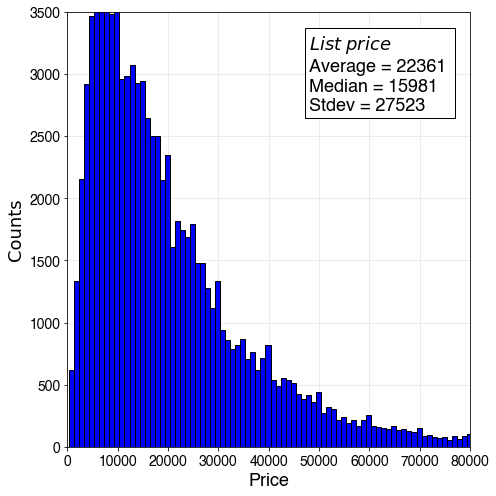

In [5]:
### HISTOGRAM PLOT: PRICE ###
import numpy as np
data = listings['Price']
data_filtered = data[(data != np.inf) & (data != 0)]

# textbox
average = int(np.nanmean(data_filtered))
median = int(np.nanmedian(data_filtered))
stdev = int(np.std(data_filtered))   
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$List$ $price$ \nAverage = %.0f \nMedian = %.0f \nStdev = %.0f' % (average, median, stdev)

import numpy as np
binwidth = 1000
xmin = 0
xmax = 80000
ymin = 0
ymax = 3500
xlabel = 'Price'
ylabel = 'Counts'
figure_name = '../images/Price_hist.png'

from plotfunctions import plot_hist
plot_hist(data_filtered, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, figure_name)

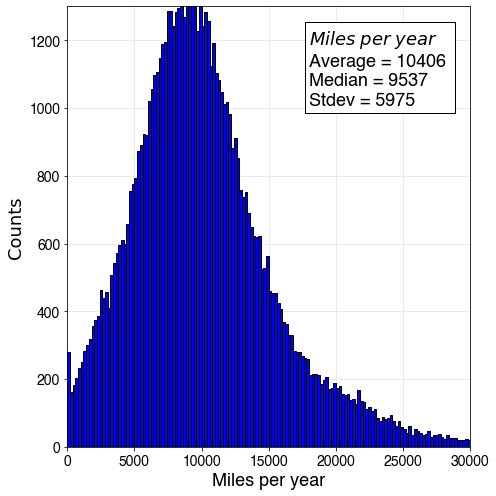

In [6]:
### HISTOGRAM PLOT: MILES PER YEAR ###
import numpy as np  
data = listings['Mileage']/(2020 - listings['Year'])
data_filtered = data[(data != np.inf) & (data != 0)]


# textbox
average = int(np.nanmean(data_filtered))
median = int(np.nanmedian(data_filtered))
stdev = int(np.std(data_filtered))   
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Miles$ $per$ $year$ \nAverage = %.0f \nMedian = %.0f \nStdev = %.0f' % (average, median, stdev)

# plot params
binwidth = 200
xmin = 0
xmax = 30000
ymin = 0
ymax = 1300
xlabel = 'Miles per year'
ylabel = 'Counts'
figure_name = '../images/Miles_vs_age_hist.png'

from plotfunctions import plot_hist
plot_hist(data_filtered, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, figure_name)

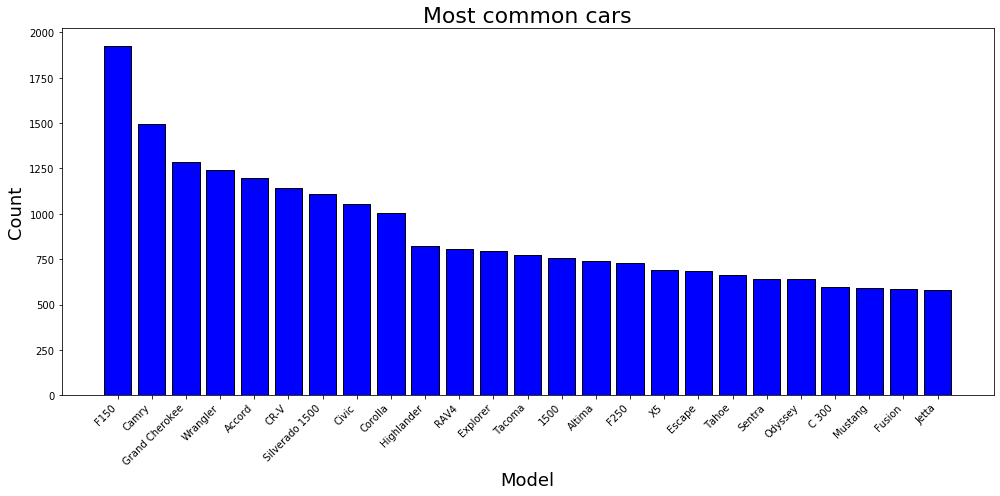

In [9]:
### BAR PLOT: MOST COMMON CARS ###
common_cars = make_model_list_sorted[:25]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(14,7))
plt.bar(common_cars['Model'], common_cars['Count'], color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Most common cars', size=22)
plt.xlabel('Model', size=18)
plt.ylabel('Count', size=18)
plt.tight_layout()

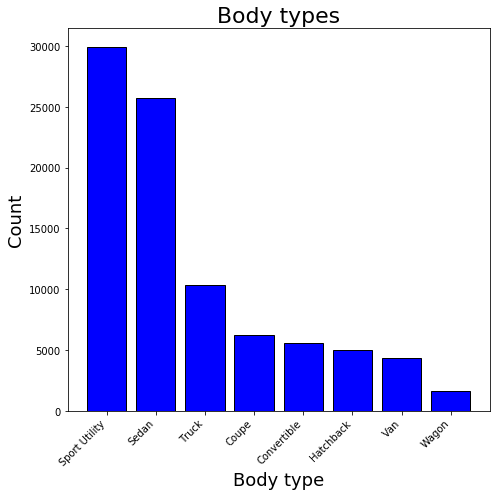

In [10]:
### BAR PLOT: MOST COMMON VEHICLE TYPE ###
body_list = listings.groupby(['Body']).size().reset_index().rename(columns={0:'Count'})
body_list = body_list.drop(body_list[body_list.Body == 'Unavailable '].index).sort_values('Count', ascending=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(7,7))
plt.bar(body_list['Body'], body_list['Count'], color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Body types', size=22)
plt.xlabel('Body type', size=18)
plt.ylabel('Count', size=18)
plt.tight_layout()